In [1]:
# project: p1
# submitter: cmbatchelor
# partner: none
# hours: 8

In [2]:
import json
import os
import csv
import pandas as pd
import subprocess
import numpy as np
from time import time

In [3]:
#q1
type(7/2)

float

In [4]:
#q2
x = 4
maximum = 10
minimum = 5
error = True # True if x is outside the minimum-to-maximum range
error

True

In [5]:
#q3
word = "KAFKAESQUE"
suffix_match = word[-5:].lower() == "esque"
suffix_match

True

In [6]:
#q4
def add(x=1, y=1):
    return x+y
add(3, 4)

7

In [7]:
#q5
add(9)

10

In [8]:
#q6
x = 4
if x < 0:
    status = "negative"
elif x > 0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [9]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)

3
4
1
6


In [10]:
#q7
def smart_count(lis_num):
    new_list = []
    for num in lis_num:
        if num > 10:
            continue
        elif num < 0:
            break
        new_list.append(num)
    
    return sum(new_list)
    
smart_count(nums)

14

In [11]:
#q8
smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [12]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

In [13]:
#q9
coord3["z"] = 3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [14]:
#q10
rows[0][-1]['x']

8

In [15]:
#q11
import copy
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change

rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [16]:
#q12
sum([lis[header.index("B")] for lis in rows])

10007

In [17]:
#q13
rows.sort(key=lambda row: row[header.index("B")])
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [18]:
f = open("usd.json")
data = json.load(f)
f.close()

In [19]:
#q14
print(type(data))
400 * data['eur']['rate'] 


<class 'dict'>


353.91881112968

In [20]:
def divide(x = 1, y = 1):
    try:
        z = x / y
        return z
    except ZeroDivisionError:
        return float('nan')
    

In [21]:
#q15
divide(3,2)

1.5

In [22]:
#q16
divide(-3,0)

nan

In [23]:
#q17
years = {}
for csv in os.listdir('home-computers'):
    path = os.path.join("home-computers", csv)
    df = pd.read_csv(path, header = 1)[:]
    years[int(csv[7:11])] = df.set_index("Geographic Area Name")

sorted(years.keys())

[2013, 2014, 2015, 2016, 2017, 2018]

In [24]:
#q18
df = years[2018]
#df
df.loc['Wisconsin']["Estimate!!Total"]

2371960

In [25]:
#q19
df["Estimate!!Total!!No Computer"].sum()

10285814

In [26]:
#q20
(df["Margin of Error!!Total!!No Computer"] / df["Estimate!!Total!!No Computer"]).max()

0.12375641594322287

In [27]:
#q21
per_no_com = df["Estimate!!Total!!No Computer"] / df["Estimate!!Total"] * 100

wisco_per = {}

states = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]

state_list = list(per_no_com.index)

for state in state_list:
    if state in states:
        wisco_per[state] = per_no_com[state]
    
wisco_per

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

<AxesSubplot:xlabel='Geographic Area Name', ylabel='% of Households w/o Computers'>

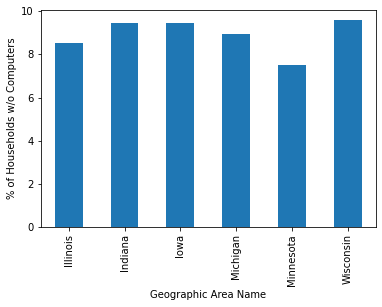

In [28]:
#q22
pd.Series(wisco_per).plot.bar(xlabel = "Geographic Area Name", 
                              ylabel = "% of Households w/o Computers")

<AxesSubplot:xlabel='Year', ylabel='WI Households without Computers (thousands)'>

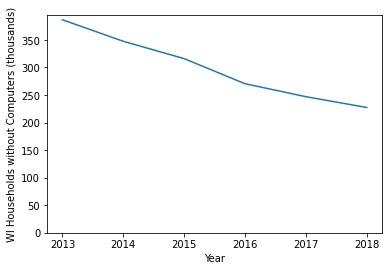

In [29]:
#q23
wi_no_comp = {}
for year in years:
    df = years[year]
    wi_no_comp[year] = df.loc["Wisconsin"]["Estimate!!Total!!No Computer"] / 1000

pd.Series(wi_no_comp).sort_values().plot.line(ylim = 0, xlabel = "Year", ylabel = "WI Households without Computers (thousands)")

<AxesSubplot:xlabel='Smartphones (millions)', ylabel='Tablets (millions)'>

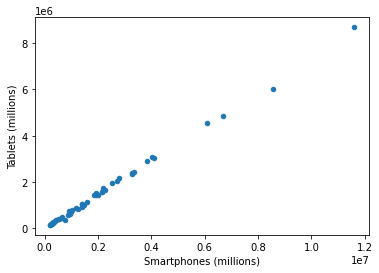

In [30]:
#q24

df = years[2018]

df.plot.scatter(x = 'Estimate!!Total!!Has one or more types of computing devices!!Smartphone', 
                y = "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer",
               xlabel = 'Smartphones (millions)',
               ylabel = 'Tablets (millions)')

In [31]:
#q25
check_main = subprocess.check_output(['git', 'checkout', 'main'], cwd = './flask',
                       encoding = 'utf-8').split('\n')
check_main

flask_log = subprocess.check_output(['git', 'log'], cwd = './flask',
                       encoding = 'utf-8').split('\n')


flask_log[0]

Previous HEAD position was 4ec7d2a0 Started working on documentation.
Switched to branch 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [32]:
#q26

def get_commit_nums(log):
    word = "commit"
    all_commits = []
    for line in log:
        if word in line[:6]:
            all_commits.append(line[7:])
    return all_commits
    
first_commits = get_commit_nums(flask_log)[-50:]
first_commits

['7b5015010bc8c2a2d56c7c50b37e5b9facdad102',
 '40e0024d7b87150ed694829a5335bd2435962225',
 '6dd92ae4b32c336564231e10db12458a8b9261ca',
 '1246f4088a4fdc00a79f8029ff5d77bfe4fc9b14',
 'c4f5c2fb9afc1679c085500830bd53fab93ad885',
 '1d8432ebfd1637eacab79a15e9b7963bf061371c',
 'fc94599285aa1aec50b3c9426697249e55edda0a',
 'c33675f0251071ea47ce166b81ce8c637842f091',
 '2d9bb692728fd76b19e467499caa4f5fcb07aede',
 'ca520fb7e4c29afccc637e61c11429a0f3e8d5ad',
 '08f1f0dc32004fae01cf96d1eed84e6461e698e5',
 '8009bd986940378bba1399dbfce90d03e441467b',
 'a42728568e18bedf588be2357b56021ab85b9fad',
 '959b5df00431c436474c5abca304e631c0de7721',
 '4affedec356ad8c9e6a107578f03fc7f5c615064',
 'de03143f6ecf9a36dd32f16f07309c64d4de03b0',
 'a01e8b49ca66608f0bd46134ff02deeb5724c799',
 '36071ca1f42a26ef327e9d14e4909a8c92cd4fae',
 '51c9829a9cdfa2bf301431f686d7a404cc7c5083',
 '2f5a4f8dbc832b0daebcd66ea8b3969589191fa7',
 '03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cd

In [33]:
#q27

subprocess.check_output(['git', 'checkout', first_commits[-3]], 
                        cwd = './flask', encoding = 'utf-8')

f = open('./flask/README')
f.read()


Note: switching to '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4ec7d2a0 Started working on documentation.


"\n                        // Flask //\n\n     because a pocket knife is not the only thing that\n                    might come in handy\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n   ~ Is it ready?\n\n      Nope, this is still work in progress, but I am happy to\n      accept patches and improvements already.\n"

In [34]:
#q28
pull_request_dict = {}
text = "Merge pull request"
for line in flask_log:
    if text in line and '/' in line:
        val = line.find('/')
        name = line[:val].split()[-1]
        
        if name not in pull_request_dict:
            count = 1
            pull_request_dict[name] = count
        else:
            pull_request_dict[name] += 1
pull_request_dict

{'Yourun-proger': 2,
 'olliemath': 1,
 'pallets': 204,
 'jugmac00': 1,
 'pgjones': 14,
 'eprigorodov': 1,
 'HenryKobin': 1,
 'delicb': 1,
 'vinzid': 1,
 'karintou8710': 1,
 'kkirsche': 2,
 'matipau': 1,
 'Makonede': 1,
 'sprutner': 1,
 'Jalkhov': 1,
 'KPLauritzen': 1,
 'greyli': 42,
 'esadek': 1,
 'na2shell': 1,
 'Rohan-Salwan': 1,
 'default-303': 1,
 'awijaya22': 1,
 'starlightknown': 1,
 'yuxiaoy1': 4,
 'kaushikk25': 1,
 'Elahi-cs': 1,
 'Hugo0': 1,
 'dannysepler': 1,
 'rafaVls': 1,
 'brettlangdon': 1,
 'oleksis': 1,
 'andrewjroth': 1,
 'ThiefMaster': 11,
 'kangetsu121': 1,
 'mbpreble': 1,
 'tonydelanuez': 1,
 'elliott-king': 1,
 'huimingz': 1,
 'lielfr': 1,
 'tirkarthi': 3,
 'nphilipp': 1,
 'WolframAlph': 1,
 'MLH-Fellowship': 2,
 'MartinThoma': 1,
 'ebonnecab': 1,
 'jackwardell': 3,
 'jab': 3,
 'DeepOde': 1,
 'stat1c-void': 1,
 'lgiordani': 1,
 'iomintz': 1,
 'jeffwidman': 8,
 'kx-chen': 1,
 'jeenuv': 1,
 'pgkrit': 1,
 'valleygtc': 1,
 'shanavas786': 1,
 'mattc41190': 2,
 'gnumoksha

In [35]:
#q29
try:
    subprocess.check_output(["pip3", "instal"], stderr=subprocess.PIPE,
                           encoding = 'utf-8')
except subprocess.CalledProcessError as e:
    output = e.stderr
output

'ERROR: unknown command "instal" - maybe you meant "install"\n'

In [36]:
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])

def itrow(rows):
    df = rand_df(rows)
    t0 = time()
    for row in df.iterrows():
        pass
    t1 = time()
    
    return (t1-t0) * 1000

def ittup(rows):
    df = rand_df(rows)
    t0 = time()
    for row in df.itertuples():
        pass
    t1 = time()
    
    return (t1-t0) * 1000

def speedloc(rows):
    df = rand_df(rows)
    t0 = time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1= time()
    return (t1-t0) * 1000

def speedat(rows):
    df = rand_df(rows)
    t0 = time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    t1 = time()
    return (t1-t0) * 1000

def speedapply(rows):
    df = rand_df(rows)
    t0 = time()
    result = df["A"].apply(laugh).tolist()
    t1 = time()
    return (t1-t0) * 1000

def speedloop(rows):
    df = rand_df(rows)
    t0 = time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t1 = time()
    return (t1-t0) * 1000

def laugh(x):
    return "ha" * x

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

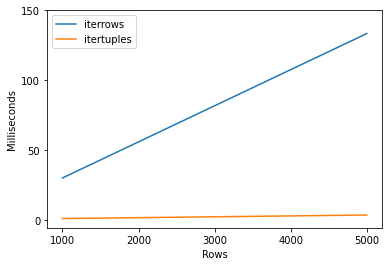

In [37]:
#q30
xtick = [1000,2000,3000,4000,5000]
ytick = [0, 50, 100, 150]

times_df = pd.DataFrame(dtype=float)
times_df.at[1000, "iterrows"] = itrow(1000)
times_df.at[5000, "iterrows"] = itrow(5000)
times_df.at[1000, "itertuples"] = ittup(1000)
times_df.at[5000, "itertuples"] = ittup(5000)
times_df.plot.line(xlabel = "Rows", ylabel = "Milliseconds",
                   xticks=xtick, yticks=ytick)

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

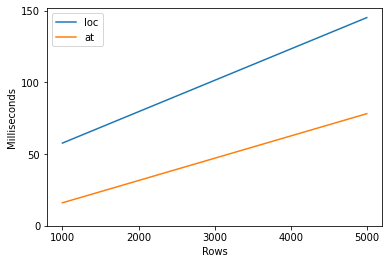

In [38]:
#q31
times_df = pd.DataFrame(dtype=float)
times_df.at[1000, "loc"] = speedloc(1000)
times_df.at[5000, "loc"] = speedloc(5000)
times_df.at[1000, "at"] = speedat(1000)
times_df.at[5000, "at"] = speedat(5000)
times_df.plot.line(xlabel = "Rows", ylabel = "Milliseconds",
                   xticks=xtick, yticks=ytick)

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

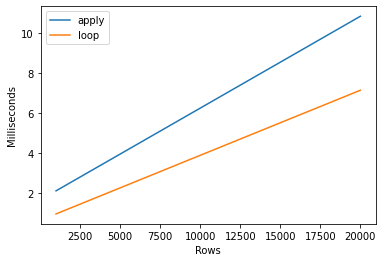

In [39]:
#q32
times_df = pd.DataFrame(dtype=float)
times_df.at[1000, "apply"] = speedapply(1000)
times_df.at[20000, "apply"] = speedapply(20000)
times_df.at[1000, "loop"] = speedloop(1000)
times_df.at[20000, "loop"] = speedloop(20000)
times_df.plot.line(xlabel = "Rows", ylabel = "Milliseconds")